In [212]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import OrderedDict 
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Keras
import keras

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Dictionary for genres label encoding:
genres = {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 
          'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}

In [118]:
data=pd.read_csv("./Features/features2.csv")
data.head()

,centroid_mean,centroid_std,chroma_mean,chroma_std,flux_mean,flux_std,genre,mfcc_0_mean,mfcc_0_std,mfcc_10_mean,...,mfcc_8_std,mfcc_9_mean,mfcc_9_std,rmse_mean,rmse_std,roloff_mean,roloff_std,tempo,zcr_mean,zcr_std
0,888.192767,379.074067,0.525691,0.295343,1.557968,1.675129,0,-298.866425,55.572163,-1.312751,...,10.512544,4.846227,12.137277,0.118639,0.061269,1770.389295,1010.104647,172.265625,0.029214,0.015715
1,1001.220509,363.289566,0.497065,0.294911,1.479048,1.466835,0,-239.033478,48.344673,-6.611788,...,8.462409,2.155131,8.355743,0.160613,0.060511,2055.339246,1014.663475,172.265625,0.034871,0.015003
2,846.548114,618.517730,0.576510,0.270677,1.633401,2.636701,0,-317.237152,81.588196,-1.960779,...,10.031506,9.536193,8.848726,0.102250,0.037121,1625.756836,1435.688964,123.046875,0.032692,0.029412
3,973.959994,609.317788,0.564331,0.271416,1.451815,2.326623,0,-300.514404,92.136734,-2.918866,...,10.758454,11.795238,10.521724,0.094613,0.039514,1878.647167,1368.791028,129.199219,0.039325,0.030719
4,1101.462315,365.249696,0.379367,0.298470,1.422705,1.567510,0,-290.625641,67.902252,-7.053016,...,9.873894,-5.429997,10.567539,0.112067,0.066417,2234.553155,871.327336,95.703125,0.050290,0.033235


In [119]:
X=data.drop('genre',axis=1)

In [120]:
y=data.genre

In [121]:
scaled_features = StandardScaler().fit_transform(X.values)
X = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)


In [239]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [240]:
X_train.shape

(1584, 39)

In [241]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

In [242]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [243]:
history = model.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=128,validation_split=0.1)

Train on 1425 samples, validate on 159 samples
Epoch 1/50
1425/1425 [==============================] - 4s 3ms/step - loss: 2.0656 - acc: 0.2968 - val_loss: 1.6174 - val_acc: 0.5220
Epoch 2/50
1425/1425 [==============================] - 0s 105us/step - loss: 1.4785 - acc: 0.4884 - val_loss: 1.2463 - val_acc: 0.5472
Epoch 3/50
1425/1425 [==============================] - 0s 69us/step - loss: 1.1552 - acc: 0.6182 - val_loss: 1.0532 - val_acc: 0.6415
Epoch 4/50
1425/1425 [==============================] - 0s 69us/step - loss: 0.9490 - acc: 0.6744 - val_loss: 0.9545 - val_acc: 0.6730
Epoch 5/50
1425/1425 [==============================] - 0s 85us/step - loss: 0.8293 - acc: 0.7102 - val_loss: 0.9117 - val_acc: 0.7107
Epoch 6/50
1425/1425 [==============================] - 0s 76us/step - loss: 0.7585 - acc: 0.7474 - val_loss: 0.9195 - val_acc: 0.6604
Epoch 7/50
1425/1425 [==============================] - 0s 68us/step - loss: 0.6735 - acc: 0.7782 - val_loss: 0.8270 - val_acc: 0.7170
Epoch 8/

In [244]:
test_loss, test_acc = model.evaluate(X_test,y_test)

396/396 [==============================] - 0s 152us/step


In [245]:
print(test_loss, test_acc)

0.6193950236445726 0.840909091511158


In [246]:
y_pred=model.predict(X_test)

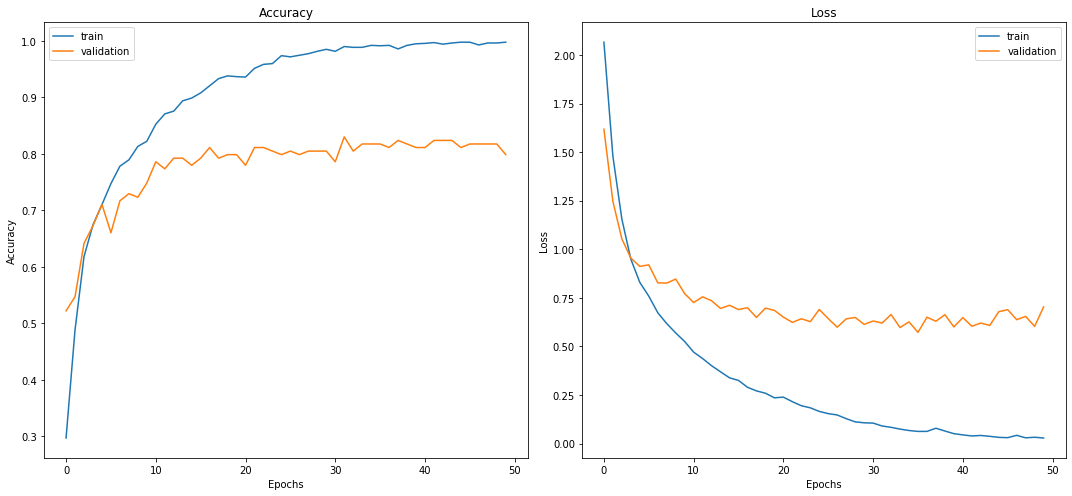

In [247]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [259]:
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


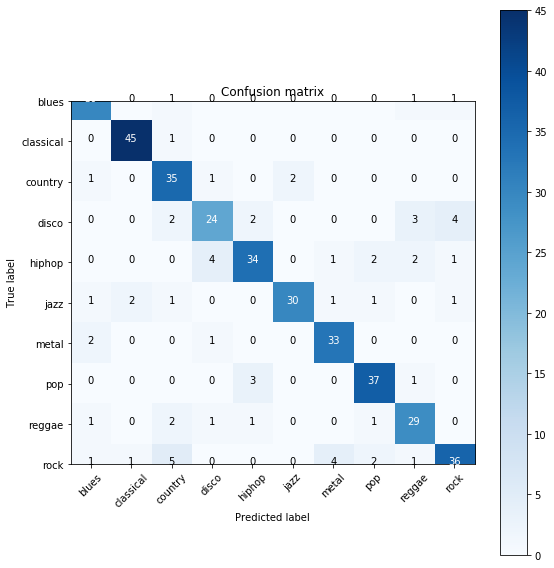

In [260]:
preds = np.argmax(model.predict(X_test), axis = 1)
cm = confusion_matrix(preds,y_test)
keys = OrderedDict(sorted(genres.items(), key=lambda t: t[1])).keys()

plt.figure(figsize=(8,8))
plot_confusion_matrix(cm, keys, normalize=False)